In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz

data = pd.read_csv("diabetes.csv")
data=data.fillna(0)
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
sns.countplot(x='Outcome',data = data.Outcome)
# sns.boxplot(data.Pregnancies ,data.Outcome )
plt.show()

ValueError: Could not interpret input 'Outcome'

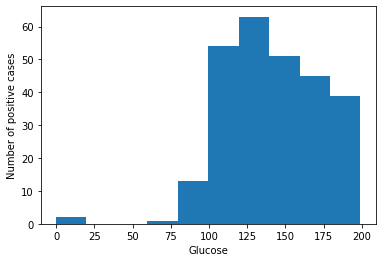

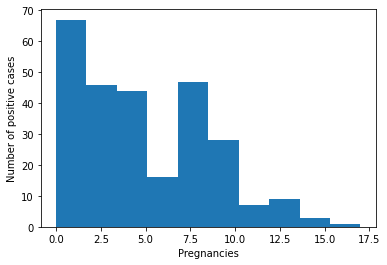

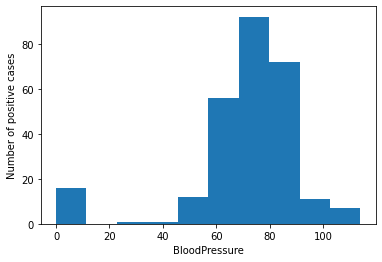

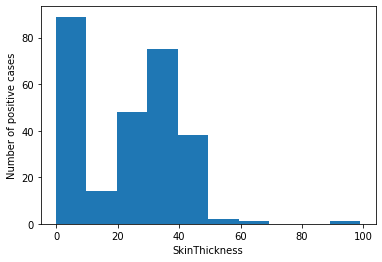

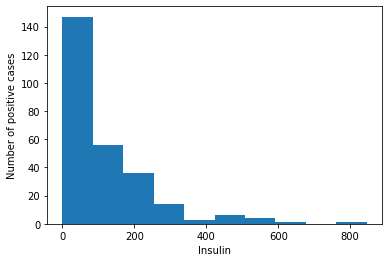

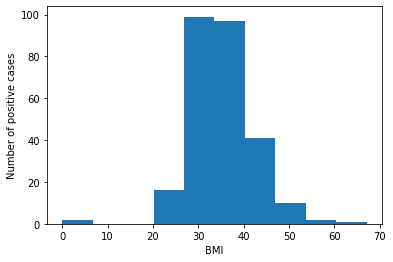

In [ ]:
plt.hist(data["Glucose"][data.Outcome==1])
plt.xlabel("Glucose")
plt.ylabel("Number of positive cases")
plt.show()
plt.hist(data["Pregnancies"][data.Outcome==1])
plt.xlabel("Pregnancies")
plt.ylabel("Number of positive cases")
plt.show()
plt.hist(data["BloodPressure"][data.Outcome==1])
plt.xlabel("BloodPressure")
plt.ylabel("Number of positive cases")
plt.show()
plt.hist(data["SkinThickness"][data.Outcome==1])
plt.xlabel("SkinThickness")
plt.ylabel("Number of positive cases")
plt.show()
plt.hist(data["Insulin"][data.Outcome==1])
plt.xlabel("Insulin")
plt.ylabel("Number of positive cases")
plt.show()
plt.hist(data["BMI"][data.Outcome==1])
plt.xlabel("BMI")
plt.ylabel("Number of positive cases")
plt.show()

In [ ]:
train , test = train_test_split(data , test_size=0.45)
x_train = train[["Pregnancies",	"Glucose"	,"BloodPressure",	"SkinThickness",	"Insulin",	"BMI",	"DiabetesPedigreeFunction",	"Age"]]
y_train = train.Outcome
x_test =test[["Pregnancies",	"Glucose"	,"BloodPressure",	"SkinThickness",	"Insulin",	"BMI",	"DiabetesPedigreeFunction",	"Age"]]
y_test =test.Outcome
# y_test = np.array(y_test)

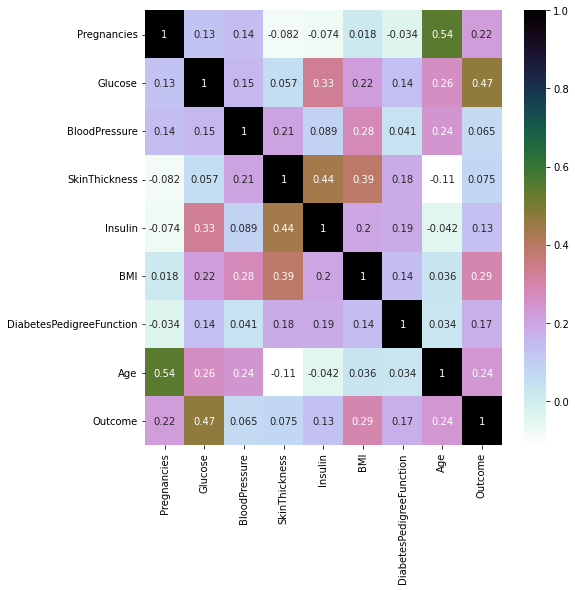

In [ ]:
plt.figure(figsize=(8,8)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
accu=metrics.accuracy_score(y_predict,y_test)
print("The accuracy of Logistic Regression is:",accu)

The accuracy of Logistic Regression is: 0.8051948051948052


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
model= DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
accu=metrics.accuracy_score(y_predict,y_test)
print("The accuracy of DecisionTreeClassifier is:",accu)

The accuracy of DecisionTreeClassifier is: 0.6820809248554913


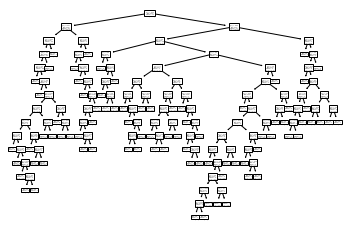

In [ ]:
tree.plot_tree(model);

In [ ]:
fn=["Pregnancies",	"Glucose"	,"BloodPressure",	"SkinThickness",	"Insulin",	"BMI",	"DiabetesPedigreeFunction",	"Age"]
cn=["yes","NO"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
_=tree.plot_tree(model,
               feature_names =fn, 
               class_names=cn,
               filled = True);
# fig.savefig('imagename.png')

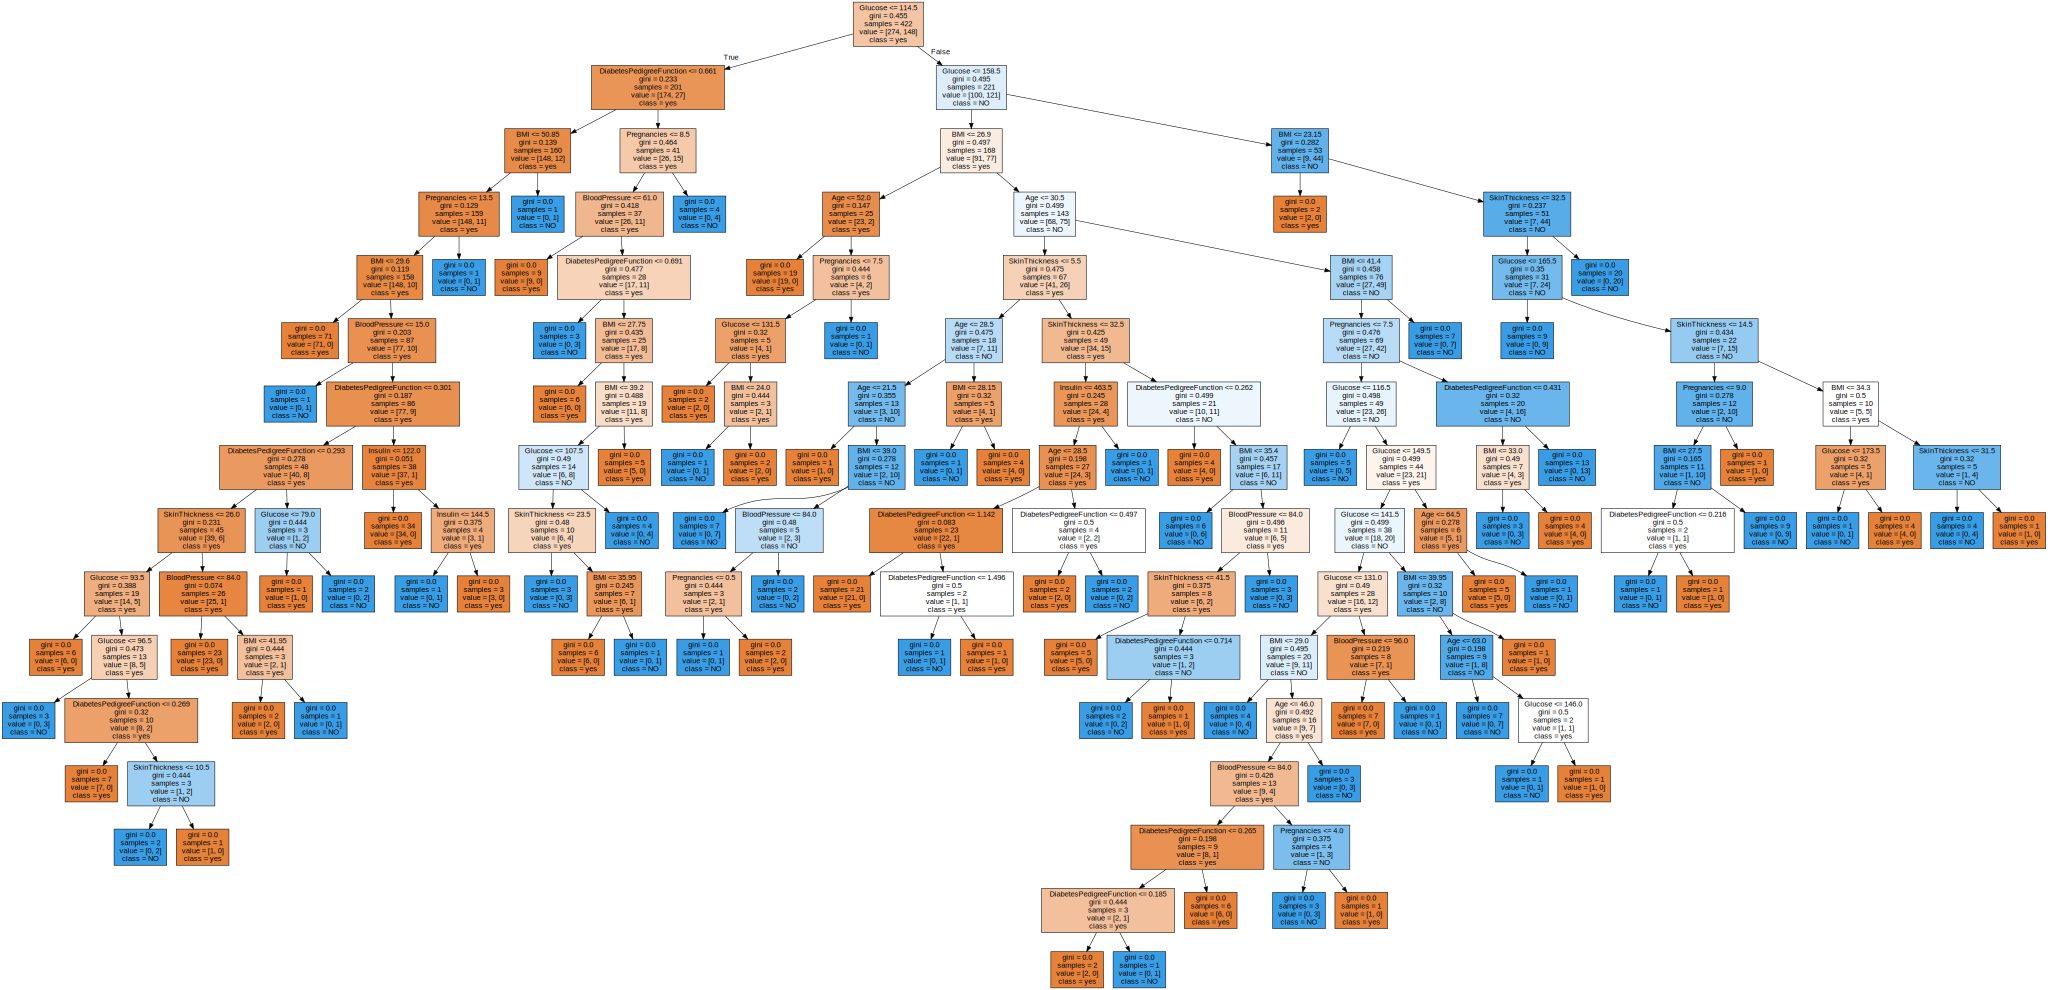

In [ ]:

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=fn,  
                                class_names=cn,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph